In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import random
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator
import time
import seaborn as sns
from sklearn.impute import KNNImputer
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.decomposition import KernelPCA
from scipy.stats import norm
import plotly.graph_objs as go
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from kmodes.kprototypes import KPrototypes


## Load Data and Data Engineering

In [16]:
df = pd.read_csv("risk_data.csv")
pd.set_option('display.max_columns', None)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      139346       1         Cash loans           M            Y   
1      332581       1         Cash loans           F            N   
2      101245       1         Cash loans           M            N   
3      186288       1         Cash loans           F            N   
4      178513       1         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          450000.0   1042560.0      40702.5   
1               Y             2          112500.0    640080.0      31261.5   
2               Y             1          112500.0    314100.0      19215.0   
3               N             2          112500.0    222547.5      17842.5   
4               Y             2           67500.0    582471.0      28458.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         900000.0   Unaccompanied  Commercial associate   
1         450000.0   Unaccompanied               Working   
2         225000.0   Unaccompanied               Working   
3         202500.0   Unaccompanied               Working   
4         409500.0          Family               Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
0  Secondary / secondary special            Married     Office apartment   
1  Secondary / secondary special            Married    House / apartment   
2  Secondary / secondary special     Civil marriage     Rented apartment   
3  Secondary / secondary special            Married  Municipal apartment   
4                Lower secondary            Married    House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.014464      -16584          -9027            -4379.0   
1                    0.035792      -10307          -3184            -2268.0   
2                    0.006305       -8402           -570            -2736.0   
3                    0.006008      -10895          -1861            -5022.0   
4                    0.020246      -14017           -723             -890.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -131         24.0           1               1                0   
1            -2996          NaN           1               1                0   
2             -803          NaN           1               1                0   
3             -733          NaN           1               1                0   
4            -5008         15.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           0           1             NaN              2.0   
1                 1           0           0             NaN              4.0   
2                 1           0           0  Security staff              3.0   
3                 1           0           0   Cooking staff              4.0   
4                 1           0           0             NaN              4.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     3                            3   
3                     2                            2   
4                     3                            3   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                     MONDAY                        7   
1                    TUESDAY                       12   
2                    TUESDAY                        5   
3                     MONDAY                       10   
4                   SATURDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2

In [17]:
# describe the data
df.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count    5042.000000  5042.000000   5042.000000      5.042000e+03   
mean   279907.116224     0.086474      0.470250      1.773172e+05   
std    103244.272079     0.281090      0.720108      1.004194e+05   
min    100020.000000     0.000000      0.000000      3.510000e+04   
25%    190899.250000     0.000000      0.000000      1.125000e+05   
50%    279541.500000     0.000000      0.000000      1.575000e+05   
75%    369669.000000     0.000000      1.000000      2.205000e+05   
max    456248.000000     1.000000      4.000000      1.350000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  5.042000e+03    5042.000000     5.041000e+03   
mean   6.226787e+05   28181.309798     5.586754e+05   
std    4.155689e+05   15024.595611     3.806711e+05   
min    4.500000e+04    2673.000000     4.500000e+04   
25%    2.792925e+05   17077.500000     2.475000e+05   
50%    5.336685e+05   26217.000000     4.500000e+05   
75%    8.409960e+05   35937.000000     7.110000e+05   
max    2.700000e+06  225000.000000     2.700000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                 5042.000000   5042.000000    5042.000000   
mean                     0.021105 -14895.446648   -2395.756446   
std                      0.014095   3700.295126    2397.824075   
min                      0.000533 -25126.000000  -16121.000000   
25%                      0.010006 -17793.750000   -3184.750000   
50%                      0.018850 -14742.000000   -1649.000000   
75%                      0.028663 -11850.250000    -746.000000   
max                      0.072508  -7678.000000      -9.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
count        5042.000000      5042.000000  1897.000000      5042.0   
mean        -4705.280246     -2811.930980    12.255667         1.0   
std          3261.251558      1506.875724    12.102259         0.0   
min        -18294.000000     -6207.000000     0.000000         1.0   
25%         -7121.750000     -4172.750000     5.000000         1.0   
50%         -4288.000000     -2892.000000     9.000000         1.0   
75%         -1957.250000     -1521.000000    15.000000         1.0   
max             0.000000        -1.000000    65.000000         1.0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE   FLAG_PHONE  \
count          5042.0      5042.000000       5042.000000  5042.000000   
mean              1.0         0.233439          0.998612     0.274296   
std               0.0         0.423061          0.037238     0.446203   
min               1.0         0.000000          0.000000     0.000000   
25%               1.0         0.000000          1.000000     0.000000   
50%               1.0         0.000000          1.000000     0.000000   
75%               1.0         0.000000          1.000000     1.000000   
max               1.0         1.000000          1.000000     1.000000   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  5042.000000      5042.000000           5042.000000   
mean      0.065252         2.214002              2.039072   
std       0.246994         0.905809              0.522705   
min       0.000000         1.000000              1.000000   
25%       0.000000         2.000000              2.000000   
50%       0.000000         2.000000              2.000000   
75%       0.000000         3.000000              2.000000   
max       1.000000         6.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                  5042.000000              5042.000000   
mean                      2.018842                12.270131   
std                       0.516963                 3.331934   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%              

In [18]:
# drop unnecessary columns
drop = ["SK_ID_CURR", "OWN_CAR_AGE", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",	"YEARS_BUILD_AVG",	"COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", 	"LANDAREA_AVG",	"LIVINGAPARTMENTS_AVG",	"LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE"	,"BASEMENTAREA_MODE",'YEARS_BEGINEXPLUATATION_MODE',	"YEARS_BUILD_MODE",	"COMMONAREA_MODE",	"ELEVATORS_MODE",	"ENTRANCES_MODE",	"FLOORSMAX_MODE",	"FLOORSMIN_MODE",	"LANDAREA_MODE",'LIVINGAPARTMENTS_MODE', 	"LIVINGAREA_MODE",	"NONLIVINGAPARTMENTS_MODE",	"NONLIVINGAREA_MODE",	"APARTMENTS_MEDI",	"BASEMENTAREA_MEDI",	"YEARS_BEGINEXPLUATATION_MEDI",	"YEARS_BUILD_MEDI",	"COMMONAREA_MEDI",	"ELEVATORS_MEDI",	"ENTRANCES_MEDI",	"FLOORSMAX_MEDI",	"FLOORSMIN_MEDI",	"LANDAREA_MEDI",	"LIVINGAPARTMENTS_MEDI",
"LIVINGAREA_MEDI",	"NONLIVINGAPARTMENTS_MEDI",	"NONLIVINGAREA_MEDI",	"TOTALAREA_MODE",	"OBS_30_CNT_SOCIAL_CIRCLE",	"DEF_30_CNT_SOCIAL_CIRCLE",	"OBS_60_CNT_SOCIAL_CIRCLE",	"DEF_60_CNT_SOCIAL_CIRCLE",	"DAYS_LAST_PHONE_CHANGE",	"FLAG_DOCUMENT_2",	"FLAG_DOCUMENT_3",	"FLAG_DOCUMENT_4",	"FLAG_DOCUMENT_5",	"FLAG_DOCUMENT_6",	"FLAG_DOCUMENT_7",	"FLAG_DOCUMENT_8",	"FLAG_DOCUMENT_9",	"FLAG_DOCUMENT_10",	"FLAG_DOCUMENT_11",	"FLAG_DOCUMENT_12",	"FLAG_DOCUMENT_13",	"FLAG_DOCUMENT_14",	"FLAG_DOCUMENT_15",	"FLAG_DOCUMENT_16",	"FLAG_DOCUMENT_17",	"FLAG_DOCUMENT_18",	"FLAG_DOCUMENT_19",	"FLAG_DOCUMENT_20",	"FLAG_DOCUMENT_21"]

df.drop(drop, axis=1, inplace=True)
drop_1 = ["APARTMENTS_AVG", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "OCCUPATION_TYPE", "FLAG_MOBIL", "FLAG_EMAIL"]
df.drop(drop_1, axis=1, inplace=True)
df = df.dropna()
df.shape

(4363, 38)

In [19]:
# divide numerical and categorical data
numeric_features = list(df.select_dtypes("float64").columns)
int_features = list(df.select_dtypes("int64").columns)
categorical_features = list(df.select_dtypes(include = ["category", "object"]).columns)
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}')

numeric_features:
['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

categorical_features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [20]:
df_numerical = df[numeric_features + int_features[1:7]]
df_categorical = df[categorical_features + int_features[0:1] + int_features[7:]]

In [21]:
# normalize data
df_numerical_norm  = (df_numerical-  df_numerical.min())/(df_numerical.max() - df_numerical.min())
df_numerical_norm

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0.315537    0.375729     0.171052         0.322034   
1             0.058864    0.224136     0.128588         0.152542   
2             0.058864    0.101356     0.074404         0.067797   
3             0.058864    0.066873     0.068231         0.059322   
5             0.134155    0.340420     0.113347         0.281356   
...                ...         ...          ...              ...   
5037          0.075975    0.178366     0.087378         0.157627   
5038          0.212868    0.639161     0.195239         0.569492   
5039          0.212868    0.288136     0.170141         0.288136   
5040          0.058864    0.050847     0.028458         0.050847   
5041          0.058864    0.072881     0.093066         0.072881   

      REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                       0.193553           0.760757              0.2   
1                       0.489878           0.876169              0.6   
2                       0.080195           0.850582              0.4   
3                       0.076068           0.725603              0.6   
5                       0.112428           0.452299              0.2   
...                          ...                ...              ...   
5037                    0.334519           0.525067              0.0   
5038                    0.419896           0.264338              0.0   
5039                    0.251490           0.734405              0.2   
5040                    0.106940           0.747198              0.2   
5041                    0.390830           0.503198              0.2   

      AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
5037                         0.0                        0.0   
5038                         0.0                        0.0   
5039                         0.0                        0.0   
5040                         0.0                        0.0   
5041                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
5037                         0.0                        0.0   
5038                         0.0                        0.0   
5039                         0.0                        0.0   
5040                         0.0                        0.0   
5041                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                           0.0                    0.090909          0.00   
1                           0.0                    0.454545          0.50   
2                           0.0                    0.090909          0.25   
3                           0.0                    0.272727          0.50   
5                           0.0                    0.272727          0.00   
...                         ...                         ...           ...   
5037                        0.4                    0.545455          0.00   
5038                        0.0                    0.363636          0.00   
5039                        0.0                    0.272727          0.00   
5040                        0.0         

{'whiskers': [<matplotlib.lines.Line2D at 0x282b433a0>,
 'caps': [<matplotlib.lines.Line2D at 0x282b43970>,
 'boxes': [<matplotlib.lines.Line2D at 0x282aa32e0>,
 'medians': [<matplotlib.lines.Line2D at 0x282b43eb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x282b5b190>,
 'means': []}

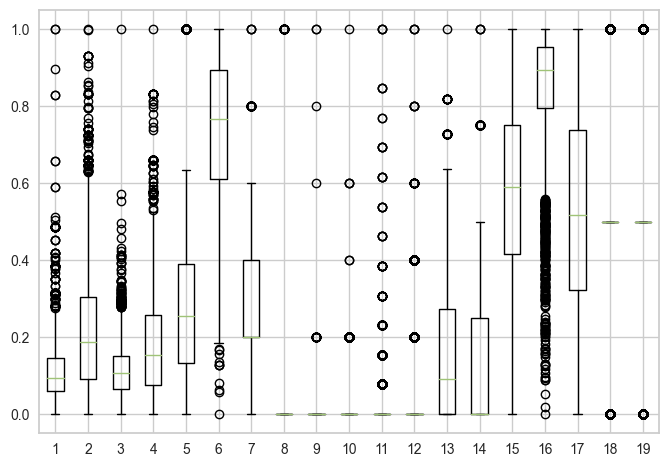

In [22]:
# draw boxplot
plt.boxplot(df_numerical_norm)

## PCA

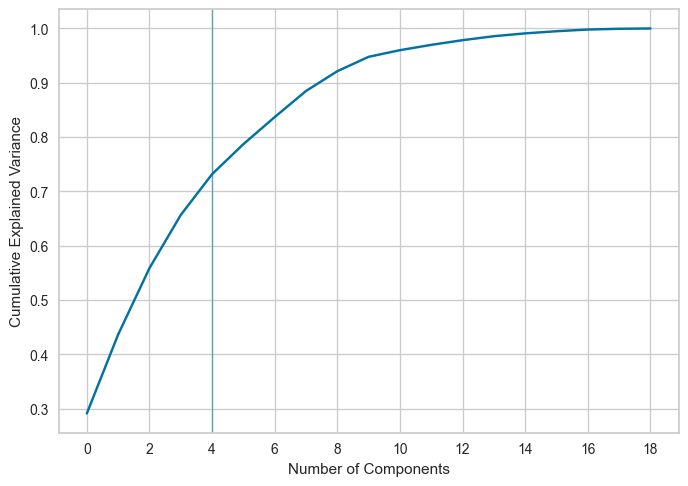

In [23]:
# figure out best value for PCA
ax = plt.figure().gca()
pca = PCA().fit(df_numerical_norm)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=4, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

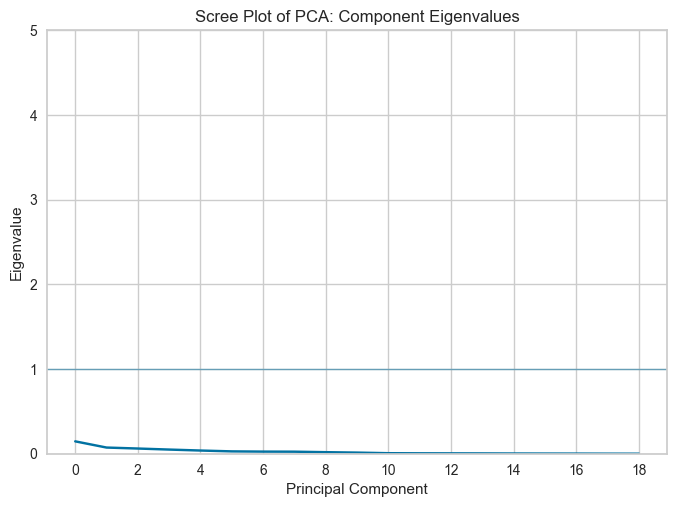

In [24]:
ax = plt.figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='b', alpha=0.5)
plt.title('Scree Plot of PCA: Component Eigenvalues')
plt.ylim([0,5])
plt.show()

In [25]:
# we choose n components = 4
pca = PCA(n_components=4)
pca_fit = pca.fit_transform(df_numerical_norm)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(4)])
df_pca

PC 1      PC 2      PC 3      PC 4
0     0.032582 -0.276232 -0.249221  0.404993
1     0.032477  0.565170  0.021508  0.068403
2    -0.777444  0.307579 -0.395502  0.066953
3    -0.123978  0.507284 -0.325979  0.093631
4     0.016547 -0.174855  0.198669 -0.005575
...        ...       ...       ...       ...
4358  0.064557 -0.362209 -0.315565 -0.026940
4359  0.214240 -0.628444  0.338833  0.457466
4360  0.063566 -0.288168  0.361444  0.027421
4361 -0.068131  0.022893  0.122907 -0.354150
4362  0.076664 -0.280108  0.284071 -0.240647

[4363 rows x 4 columns]

## Kmeans

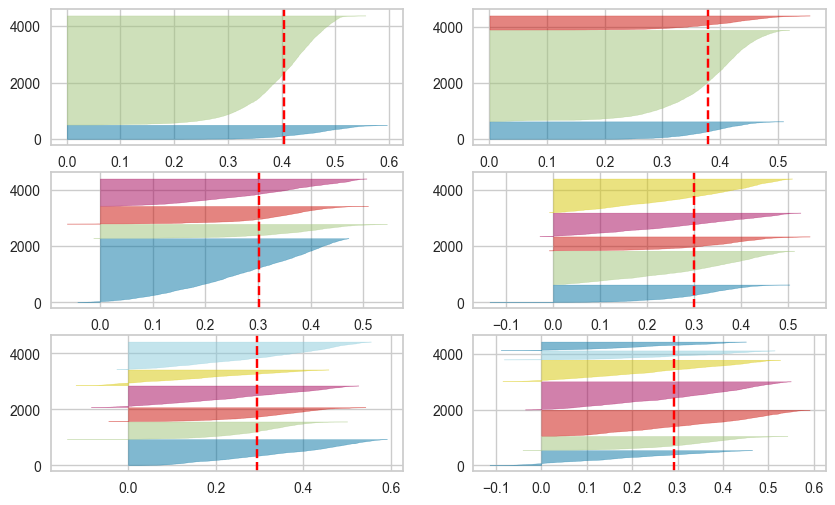

In [26]:
# draw Sihousette Visualization for K-mean
scores = ['cluster '+str(i)+': ' for i in range(2,8)]
fig, ax = plt.subplots(3, 2, figsize=(10,6))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)
    scores[i-2] += str(round(visualizer.silhouette_score_,2))

In [27]:
# output Sihousette score
scores

['cluster 2: 0.4',
 'cluster 3: 0.38',
 'cluster 4: 0.3',
 'cluster 5: 0.3',
 'cluster 6: 0.29',
 'cluster 7: 0.29']

In [28]:
# we choose n_clusters = 5 from Silhouette visualizer
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 428)
y_kmeans = kmeans.fit_predict(df_pca)

In [29]:
# get Davies–Bouldin index (DBI) Score (lower the better)
print("Davies–Bouldin index (DBI) is: ",davies_bouldin_score(df_pca, y_kmeans))

Davies–Bouldin index (DBI) is:  1.0858550709617618


In [30]:
# get Calinski-Harabasz index (higher the better)
print("Calinski-Harabasz index is: ",metrics.calinski_harabasz_score(df_pca, y_kmeans))

Calinski-Harabasz index is:  1795.112740599773


In [31]:
df["cluster_kmean"] = y_kmeans

In [32]:
def get_default_prob(a):
    i = 0
    res = []
    while (i < len(a)):
        percent = 1-a[i]/(a[i]+a[i+1])
        res.append(percent)
        i += 2
    return res

In [33]:
# get default ratio in each group for K-means
kmean_label = df.groupby("cluster_kmean")["TARGET"].value_counts().values

get_default_prob(kmean_label)

[0.11378205128205132,
 0.10307564422277637,
 0.07609988109393584,
 0.06934001670843781,
 0.04016064257028118]

## Hierarchical Clustering

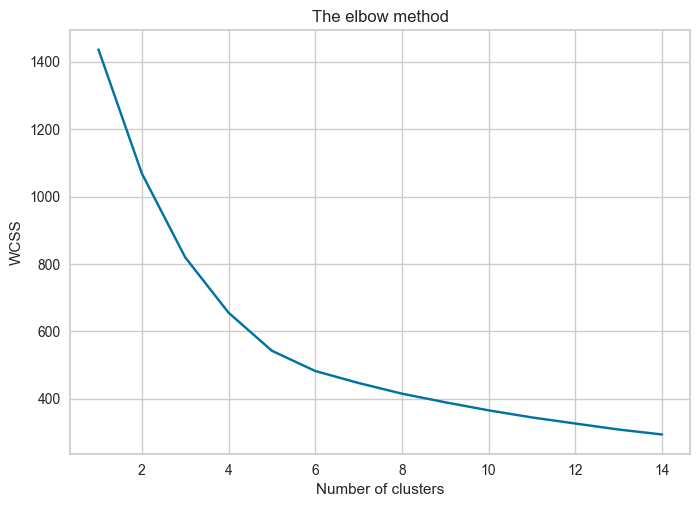

In [34]:
# plot wcss and find elbow point
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Try only numerical

In [35]:
# fit model and make predication
Z5 = AgglomerativeClustering(n_clusters=3, linkage='ward')

Z5.fit_predict(df_pca)
labels = Z5.labels_
labels

array([0, 0, 2, ..., 0, 0, 0])

In [36]:
# get Davies–Bouldin index (DBI) Score (lower the better)
print(davies_bouldin_score(df_pca, labels))

1.1317981868450053


In [37]:
# get Calinski-Harabasz index (higher the better)
print(metrics.calinski_harabasz_score(df_pca, labels))

1638.6340706560245


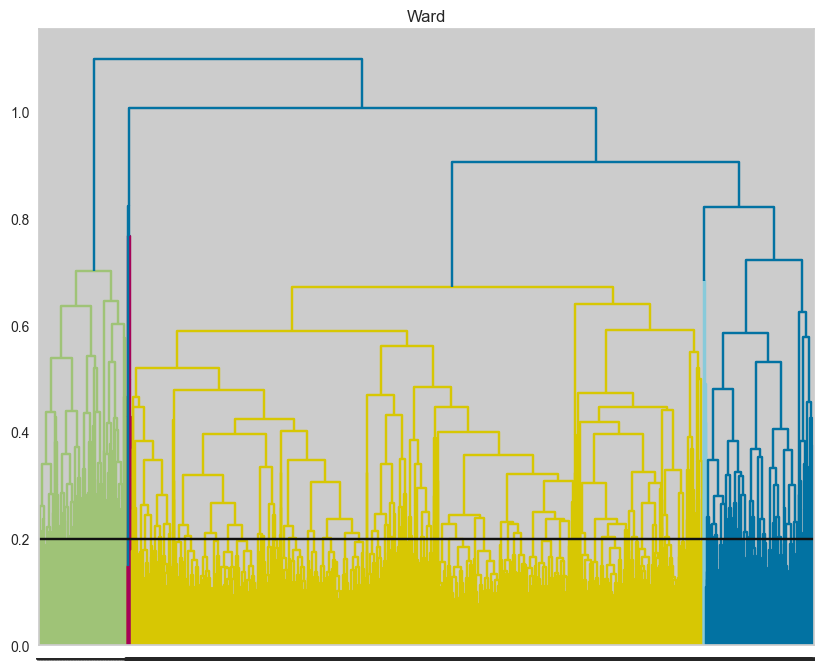

In [38]:
# Creating Dendrogram for our data with columns only numerical
# max_d = cut-off/ Threshold value
max_d = 0.2
Z5 = linkage(df_pca, method='average', metric='euclidean')
plt.figure(figsize=(10, 8))
dendrogram(Z5,labels=labels), plt.title('Ward')

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.show()

In [39]:
# get default ratio in each group for hierarchy
df["cluster_hierarchy"] = labels
hierarchy_numeric_label = df.groupby("cluster_hierarchy")["TARGET"].value_counts().values

get_default_prob(hierarchy_numeric_label)


[0.08361616784942916, 0.04008016032064132, 0.1139646869983949]

## Try with both numerical and categorical

In [40]:
df_categorical = pd.get_dummies(df_categorical)
df_pca = df_pca.reset_index(drop=True)
df_categorical= df_categorical.reset_index(drop=True)
df_concat_both = pd.concat([df_pca,df_categorical],axis=1)
df_concat_both

PC 1      PC 2      PC 3      PC 4  TARGET  HOUR_APPR_PROCESS_START  \
0     0.032582 -0.276232 -0.249221  0.404993       1                        7   
1     0.032477  0.565170  0.021508  0.068403       1                       12   
2    -0.777444  0.307579 -0.395502  0.066953       1                        5   
3    -0.123978  0.507284 -0.325979  0.093631       1                       10   
4     0.016547 -0.174855  0.198669 -0.005575       1                       11   
...        ...       ...       ...       ...     ...                      ...   
4358  0.064557 -0.362209 -0.315565 -0.026940       0                       13   
4359  0.214240 -0.628444  0.338833  0.457466       0                       13   
4360  0.063566 -0.288168  0.361444  0.027421       0                       11   
4361 -0.068131  0.022893  0.122907 -0.354150       0                       13   
4362  0.076664 -0.280108  0.284071 -0.240647       0                       10   

      REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
4358                           0                           0   
4359                           0                           0   
4360                           0                           0   
4361                           0                           0   
4362                           0                           0   

      LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                               0                       0   
1                               0                       0   
2                               0                       1   
3                               0                       0   
4                               0                       0   
...                           ...                     ...   
4358                            0                       0   
4359                            0                       0   
4360                            0                       0   
4361                            0                       0   
4362                            0                       0   

      REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                          1                        1   
1                          1                        1   
2                          1                        1   
3                          0                        0   
4                          0                        0   
...                      ...                      ...   
4358                       0                        0   
4359                       0                        0   
4360                       1                        1   
4361                       0                        0   
4362                       0                        0   

      NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
0                                 1                                   0   
1                                 1                                   0   
2                                 1                                   0   
3                                 1                                   0   
4                                 1                                   0   
...                             ...                                 ...   
4358                              1                                   0   
4359                              1                                   0   
4360                              0                                   1   
4361                              0                                   1   
4362                     

In [41]:
Z5 = AgglomerativeClustering(n_clusters=3, linkage='ward')

Z5.fit_predict(df_concat_both)
labels = Z5.labels_
labels

array([2, 1, 2, ..., 1, 1, 1])

In [42]:
# get Davies–Bouldin index (DBI) Score (lower the better)
print(davies_bouldin_score(df_concat_both, labels))

1.293977342111986


In [43]:
# get Calinski-Harabasz index (higher the better)
print(metrics.calinski_harabasz_score(df_concat_both, labels))

1994.7174927598649


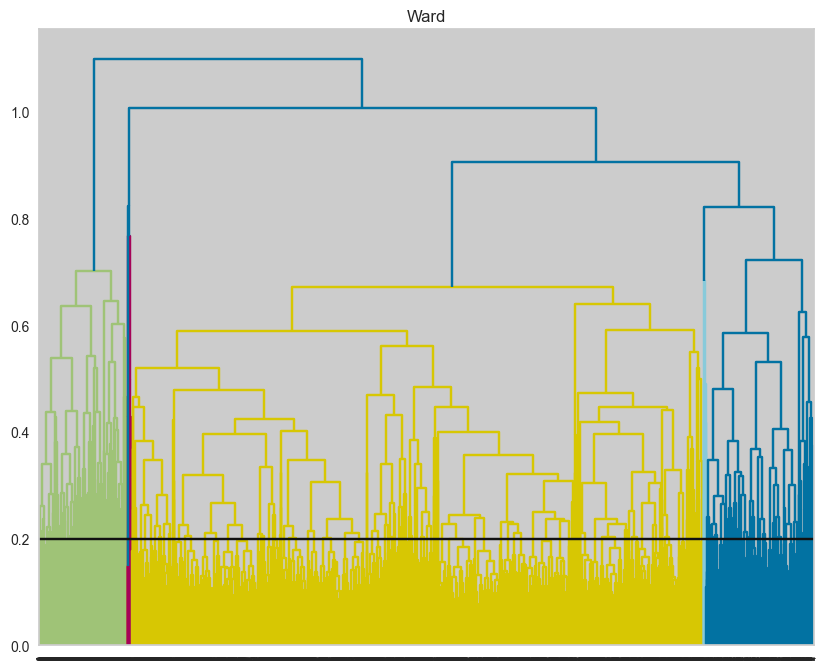

In [44]:
# Creating Dendrogram for our data with columns numerical and categorical
# max_d = cut-off/ Threshold value
max_d = 0.2
Z5 = linkage(df_pca, method='average', metric='euclidean')
plt.figure(figsize=(10, 8))
dendrogram(Z5,labels=labels), plt.title('Ward')

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.show()

In [45]:
# get default ratio in each group for hierarchy
hierarchy_both_label = df.groupby("cluster_hierarchy")["TARGET"].value_counts().values

get_default_prob(hierarchy_both_label)

[0.08361616784942916, 0.04008016032064132, 0.1139646869983949]

**We found that the effect for both numeric and categorical is worse than only numeric through score and group default probability above**

## KPrototypes

In [46]:
df_numerical = df[numeric_features + int_features[1:7]]
df_categorical = df[categorical_features + int_features[0:1] + int_features[7:]]
df_numerical_norm  = (df_numerical-  df_numerical.min())/(df_numerical.max() - df_numerical.min())
df_numerical_norm

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0.315537    0.375729     0.171052         0.322034   
1             0.058864    0.224136     0.128588         0.152542   
2             0.058864    0.101356     0.074404         0.067797   
3             0.058864    0.066873     0.068231         0.059322   
5             0.134155    0.340420     0.113347         0.281356   
...                ...         ...          ...              ...   
5037          0.075975    0.178366     0.087378         0.157627   
5038          0.212868    0.639161     0.195239         0.569492   
5039          0.212868    0.288136     0.170141         0.288136   
5040          0.058864    0.050847     0.028458         0.050847   
5041          0.058864    0.072881     0.093066         0.072881   

      REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                       0.193553           0.760757              0.2   
1                       0.489878           0.876169              0.6   
2                       0.080195           0.850582              0.4   
3                       0.076068           0.725603              0.6   
5                       0.112428           0.452299              0.2   
...                          ...                ...              ...   
5037                    0.334519           0.525067              0.0   
5038                    0.419896           0.264338              0.0   
5039                    0.251490           0.734405              0.2   
5040                    0.106940           0.747198              0.2   
5041                    0.390830           0.503198              0.2   

      AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
5037                         0.0                        0.0   
5038                         0.0                        0.0   
5039                         0.0                        0.0   
5040                         0.0                        0.0   
5041                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
5037                         0.0                        0.0   
5038                         0.0                        0.0   
5039                         0.0                        0.0   
5040                         0.0                        0.0   
5041                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                           0.0                    0.090909          0.00   
1                           0.0                    0.454545          0.50   
2                           0.0                    0.090909          0.25   
3                           0.0                    0.272727          0.50   
5                           0.0                    0.272727          0.00   
...                         ...                         ...           ...   
5037                        0.4                    0.545455          0.00   
5038                        0.0                    0.363636          0.00   
5039                        0.0                    0.272727          0.00   
5040                        0.0         

In [47]:
df_aa = pd.concat([df_numerical_norm, df_categorical], axis=1)
df_aa

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0.315537    0.375729     0.171052         0.322034   
1             0.058864    0.224136     0.128588         0.152542   
2             0.058864    0.101356     0.074404         0.067797   
3             0.058864    0.066873     0.068231         0.059322   
5             0.134155    0.340420     0.113347         0.281356   
...                ...         ...          ...              ...   
5037          0.075975    0.178366     0.087378         0.157627   
5038          0.212868    0.639161     0.195239         0.569492   
5039          0.212868    0.288136     0.170141         0.288136   
5040          0.058864    0.050847     0.028458         0.050847   
5041          0.058864    0.072881     0.093066         0.072881   

      REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                       0.193553           0.760757              0.2   
1                       0.489878           0.876169              0.6   
2                       0.080195           0.850582              0.4   
3                       0.076068           0.725603              0.6   
5                       0.112428           0.452299              0.2   
...                          ...                ...              ...   
5037                    0.334519           0.525067              0.0   
5038                    0.419896           0.264338              0.0   
5039                    0.251490           0.734405              0.2   
5040                    0.106940           0.747198              0.2   
5041                    0.390830           0.503198              0.2   

      AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
5037                         0.0                        0.0   
5038                         0.0                        0.0   
5039                         0.0                        0.0   
5040                         0.0                        0.0   
5041                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
5                            0.0                        0.0   
...                          ...                        ...   
5037                         0.0                        0.0   
5038                         0.0                        0.0   
5039                         0.0                        0.0   
5040                         0.0                        0.0   
5041                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  CNT_CHILDREN  \
0                           0.0                    0.090909          0.00   
1                           0.0                    0.454545          0.50   
2                           0.0                    0.090909          0.25   
3                           0.0                    0.272727          0.50   
5                           0.0                    0.272727          0.00   
...                         ...                         ...           ...   
5037                        0.4                    0.545455          0.00   
5038                        0.0                    0.363636          0.00   
5039                        0.0                    0.272727          0.00   
5040                        0.0         

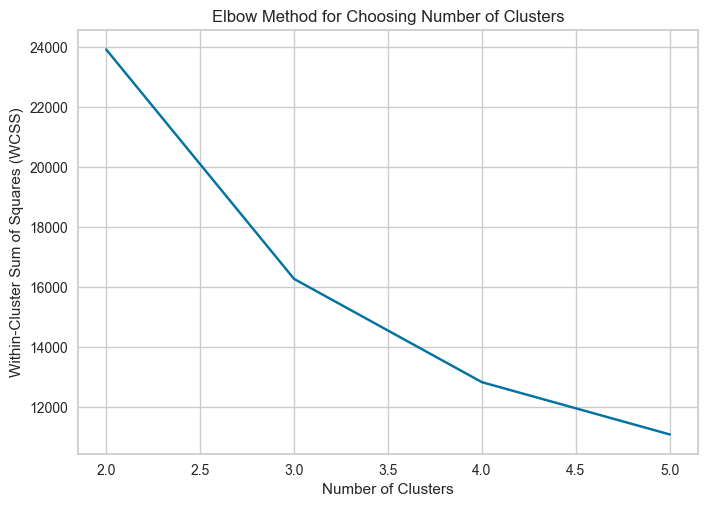

In [48]:
# Instantiate the KPrototypes object with the desired number of clusters and other parameters
# kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)


cat_indices = [df_aa.columns.get_loc(col) for col in categorical_features]

# # Fit the model on the data using the numeric and categorical columns
# clusters = kproto.fit_predict(df_aa.values, categorical= cat_indices)



n_clusters_range = range(2, 6)
wcss = []

for n_clusters in n_clusters_range:
    kproto = KPrototypes(n_clusters=n_clusters)
    clusters = kproto.fit_predict(df_aa.values, categorical=cat_indices)
    wcss.append(kproto.cost_)

# Plot the WCSS values against the number of clusters
plt.plot(n_clusters_range, wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Choosing Number of Clusters")
plt.show()

In [49]:
# get kproto cluster
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(df_aa.values, categorical= cat_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 220, ncost: 17829.56567140525
Run: 1, iteration: 2/100, moves: 0, ncost: 17829.56567140525
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 858, ncost: 17217.094961886804
Run: 2, iteration: 2/100, moves: 37, ncost: 17206.739506265698
Run: 2, iteration: 3/100, moves: 0, ncost: 17206.739506265698
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1280, ncost: 17387.553386367137
Run: 3, iteration: 2/100, moves: 196, ncost: 17206.739506265694
Run: 3, iteration: 3/100, moves: 0, ncost: 17206.739506265694
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 1603, ncost: 17356.84790348037
Run: 4, iteration: 2/100, moves: 177

In [50]:
df_categorical_encoded = pd.get_dummies(df_categorical)
df_db = pd.concat([df_numerical_norm, df_categorical_encoded], axis = 1)


In [51]:
# get Davies–Bouldin index (DBI) Score (lower the better)
print(davies_bouldin_score(df_db,clusters))

1.4386722374776146


In [52]:
# get Calinski-Harabasz index (higher the better)
print(metrics.calinski_harabasz_score(df_db, clusters))

2308.9490030516936


In [53]:
df["cluster_proto"] = clusters
kp_label = df.groupby("cluster_proto")["TARGET"].value_counts().values

get_default_prob(kp_label)

[0.08204581779435272, 0.06830122591943955, 0.09672619047619047]

## Find the variable Importance for original variable on PCA

In [54]:
# print column mean for pca components
pca.fit_transform(df_numerical_norm)
comps = pca.components_
# calculate the column means
column_means = np.mean(comps, axis=0)

print(column_means)

[ 4.73211922e-02  1.92366920e-01  6.71748899e-02  1.76419206e-01
  7.93202469e-02  1.30111002e-02  2.29042887e-01 -1.65612713e-03
 -1.44469653e-04 -4.78923886e-04  2.34233035e-03  1.41814655e-03
 -3.40125408e-02  2.14994684e-01  5.77422790e-05 -2.78879905e-02
 -1.43891767e-01 -1.53553272e-01 -1.54099278e-01]


In [55]:
# rank the importance
names = numeric_features + int_features[1:7]
importances = []
for i in range(len(names)):
    importances.append((abs(column_means[i]),names[i]))
importances.sort(reverse=True)
importances

[(0.22904288672127304, 'CNT_FAM_MEMBERS'),
 (0.21499468388470286, 'CNT_CHILDREN'),
 (0.19236692029340718, 'AMT_CREDIT'),
 (0.17641920595079286, 'AMT_GOODS_PRICE'),
 (0.15409927810266547, 'REGION_RATING_CLIENT_W_CITY'),
 (0.1535532716432284, 'REGION_RATING_CLIENT'),
 (0.14389176719688473, 'DAYS_ID_PUBLISH'),
 (0.07932024692015523, 'REGION_POPULATION_RELATIVE'),
 (0.06717488988228498, 'AMT_ANNUITY'),
 (0.04732119215811298, 'AMT_INCOME_TOTAL'),
 (0.034012540770018085, 'AMT_REQ_CREDIT_BUREAU_YEAR'),
 (0.027887990456457748, 'DAYS_EMPLOYED'),
 (0.013011100199529144, 'DAYS_REGISTRATION'),
 (0.002342330350007343, 'AMT_REQ_CREDIT_BUREAU_MON'),
 (0.001656127131608394, 'AMT_REQ_CREDIT_BUREAU_HOUR'),
 (0.0014181465455133499, 'AMT_REQ_CREDIT_BUREAU_QRT'),
 (0.00047892388637817314, 'AMT_REQ_CREDIT_BUREAU_WEEK'),
 (0.00014446965315192582, 'AMT_REQ_CREDIT_BUREAU_DAY'),
 (5.774227896581524e-05, 'DAYS_BIRTH')]

## Creating Visualization Graph for PCA and Origin Variables for Different Methods

### PCA Clustering Plot

In [65]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df_pca["PC 1"],
    y=df_pca["PC 2"],
    z=df_pca["PC 3"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_kmean"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(scene=dict(xaxis_title='PC 1', yaxis_title='PC 2', zaxis_title='PC 3'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
# Change the size of the figure
fig.update_layout(
    width=900, # Set the width of the figure to 800 pixels
    height=900 # Set the height of the figure to 600 pixels
)
# Show the plot
fig.show()

In [57]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df_pca["PC 1"],
    y=df_pca["PC 2"],
    z=df_pca["PC 4"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_kmean"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(scene=dict(xaxis_title='PC 1', yaxis_title='PC 2', zaxis_title='PC 4'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
# Change the size of the figure
fig.update_layout(
    width=1000, # Set the width of the figure to 800 pixels
    height=1000 # Set the height of the figure to 600 pixels
)
# Show the plot
fig.show()

In [66]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df_pca["PC 2"],
    y=df_pca["PC 3"],
    z=df_pca["PC 4"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_kmean"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(scene=dict(xaxis_title='PC 2', yaxis_title='PC 3', zaxis_title='PC 4'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
# Change the size of the figure
fig.update_layout(
    width=900, # Set the width of the figure to 800 pixels
    height=900 # Set the height of the figure to 600 pixels
)
# Show the plot
fig.show()

In [59]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df_pca["PC 1"],
    y=df_pca["PC 2"],
    z=df_pca["PC 3"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_hierarchy"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(scene=dict(xaxis_title='PC 1', yaxis_title='PC 2', zaxis_title='PC 3'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
# Change the size of the figure
fig.update_layout(
    width=1000, # Set the width of the figure to 800 pixels
    height=1000 # Set the height of the figure to 600 pixels
)
# Show the plot
fig.show()

In [67]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df_pca["PC 1"],
    y=df_pca["PC 2"],
    z=df_pca["PC 4"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_hierarchy"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(scene=dict(xaxis_title='PC 1', yaxis_title='PC 2', zaxis_title='PC 4'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
# Change the size of the figure
fig.update_layout(
    width=900, # Set the width of the figure to 800 pixels
    height=900 # Set the height of the figure to 600 pixels
)
# Show the plot
fig.show()

In [61]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df_pca["PC 2"],
    y=df_pca["PC 3"],
    z=df_pca["PC 4"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_hierarchy"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(scene=dict(xaxis_title='PC 2', yaxis_title='PC 3', zaxis_title='PC 4'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
fig.update_layout(
    width=1000, # Set the width of the figure to 800 pixels
    height=1000 # Set the height of the figure to 600 pixels
)

# Show the plot
fig.show()

### K-mean Original Variable Plot

In [62]:
# Create a trace for the scatter plot for K-mean
trace = go.Scatter3d(
    x=df["DAYS_EMPLOYED"]*-1/365,
    y=df["AMT_CREDIT"],
    z=df["AMT_INCOME_TOTAL"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_kmean"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# define the layout and set the axis names
fig.update_layout(title='3D Cluster Visualization for K-mean')
fig.update_layout(scene=dict(xaxis_title='Year Employed', yaxis_title='Credit Amount of Loans', zaxis_title='Income of Client'))
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))
# Change the size of the figure
fig.update_layout(
    width=1000, # Set the width of the figure to 800 pixels
    height=1000 # Set the height of the figure to 600 pixels
)
# Show the plot
fig.show()

### Hierarchical Clustering Original Variable Plot

In [63]:
# Create a trace for the scatter plot for H
trace = go.Scatter3d(
    x=df["DAYS_EMPLOYED"]*-1/365,
    y=df["AMT_CREDIT"],
    z=df["AMT_INCOME_TOTAL"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_hierarchy"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)


# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(title='3D Cluster Visualization for Hierarchy')
fig.update_layout(scene=dict(xaxis_title='Year Employed', yaxis_title='Credit Amount of Loans', zaxis_title='Income of Client'))

# Change the size of the figure
fig.update_layout(
    width=1000, # Set the width of the figure to 800 pixels
    height=1000 # Set the height of the figure to 600 pixels
)

# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))

# Show the plot
fig.show()

### Kproto Clustering Original Variable Plot

In [64]:
# Create a trace for the scatter plot for H
trace = go.Scatter3d(
    x=df["DAYS_EMPLOYED"]*-1/365,
    y=df["AMT_CREDIT"],
    z=df["AMT_INCOME_TOTAL"],
    mode='markers',
    marker=dict(
        size= 5,
        color=df["cluster_proto"],
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create the layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)


# Create a figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(title='3D Cluster Visualization for Hierarchy')
fig.update_layout(scene=dict(xaxis_title='Year Employed', yaxis_title='Credit Amount of Loans', zaxis_title='Income of Client'))

# Change the size of the figure
fig.update_layout(
    width=1000, # Set the width of the figure to 800 pixels
    height=1000 # Set the height of the figure to 600 pixels
)
# Set the range of the y-axis
#fig.update_layout(scene=dict(xaxis=dict(range=[0, 0.6*10**6])))

# Show the plot
fig.show()